In [2]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data

In [3]:
# pandas reader로 데이터 가져오기
def getCloseDataPandas(ticker, start,end=None):
    print(ticker)
    return data.get_data_yahoo(ticker, start,end)['Close']

In [4]:
# financeDataReader로 데이터 가져오기
def getCloseData(ticker, start, end=None):
    print(ticker)
    return fdr.DataReader(ticker,start,end)['Close']

In [5]:
def getDayReturn(closeDataSet):
    return (closeDataSet/closeDataSet.shift(1)).fillna(1)

In [6]:
def getCumulativeReturn(closeDataSet):
    return closeDataSet / closeDataSet.iloc[0]

In [7]:
def getPortfolioResult(closeDataSet, weight = None):
    dayReturn = getDayReturn(closeDataSet)
    cumulativeReturn = getCumulativeReturn(closeDataSet)
    if not weight:
        weight = [1/len(closeDataSet.columns)] * len(closeDataSet.columns)
        
    portfolioCumulativeReturn = (weight*cumulativeReturn).sum(axis=1)
    portfolioDayReturn = (portfolioCumulativeReturn/portfolioCumulativeReturn.shift(1)).fillna(1)
    
    return portfolioDayReturn, portfolioCumulativeReturn

In [8]:
def getEvaluation(cumulativeReturn):
    cagr = cumulativeReturn.iloc[-1] ** (252/len(cumulativeReturn))
    dd = (cumulativeReturn.cummax() - cumulativeReturn)/ cumulativeReturn.cummax()*100
    mdd = dd.max()
    
    print(f"최종 수익률 : {cumulativeReturn.iloc[-1]}\ncagr: {cagr}\nmdd: {mdd}")
    return cagr,dd,mdd

In [9]:
SPY = getCloseDataPandas("SPY","2000")
kodex10Bond = getCloseData("152380","2000")

closeDataSet = pd.concat([SPY, kodex10Bond], axis=1)
closeDataSet.columns=['SPY','kodex10Bond']
closeDataSet.dropna(inplace= True)
closeDataSet

SPY
152380


,SPY,kodex10Bond
Date,,
2012-01-20,131.949997,49960.0
2012-01-25,132.559998,49960.0
2012-01-26,131.880005,49930.0
2012-01-27,131.820007,50000.0
2012-01-30,131.369995,50130.0
...,...,...
2022-09-22,374.220001,60875.0
2022-09-23,367.950012,60310.0
2022-09-26,364.309998,59390.0


In [10]:
SPYDayReturn = getDayReturn(closeDataSet['SPY'])
SPYCumReturn = getCumulativeReturn(closeDataSet['SPY'])

SPYCagr, SPYDd, SPYMdd = getEvaluation(SPYCumReturn)

최종 수익률 : 2.808109187942145
cagr: 1.1073795063561291
mdd: 34.10474689324395


In [11]:
SPYCumReturn

Date
2012-01-20    1.000000
2012-01-25    1.004623
2012-01-26    0.999470
2012-01-27    0.999015
2012-01-30    0.995604
                ...   
2022-09-22    2.836074
2022-09-23    2.788556
2022-09-26    2.760970
2022-09-27    2.753922
2022-09-28    2.808109
Name: SPY, Length: 2551, dtype: float64

- cagr: 역복리 수익률 (10%)
- mdd : (34%)
- 최종 : 3.5배 수익이 나옴


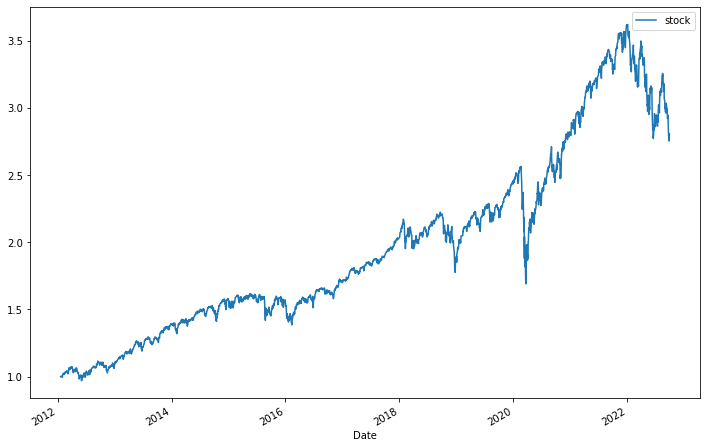

In [12]:
plt.figure(figsize=(12,8))
SPYCumReturn.plot(label="stock")
plt.legend()
plt.show()

# 주식과 채권 비교

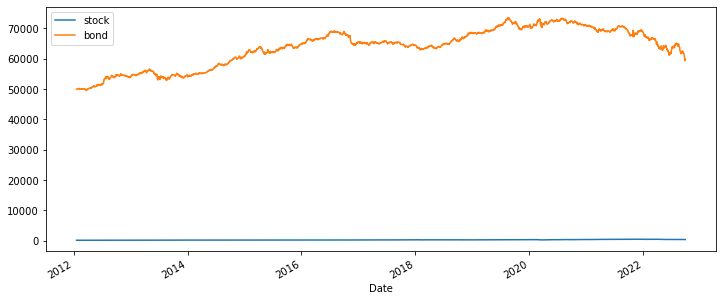

In [13]:
plt.figure(figsize=(12,5))
closeDataSet['SPY'].plot(label="stock")
closeDataSet['kodex10Bond'].plot(label="bond")

plt.legend()
plt.show()

In [14]:
SPY = getCloseDataPandas("SPY","2000","2022-09-23")
kodex10Bond = getCloseData("152380" , "2000","2022-09-23")

closeDataSet = pd.concat([SPY, kodex10Bond], axis =1)
closeDataSet.columns = ['SPY', 'kodex10Bond']
closeDataSet.dropna(inplace=True)
closeDataSet

SPY
152380


,SPY,kodex10Bond
Date,,
2012-01-20,131.949997,49960.0
2012-01-25,132.559998,49960.0
2012-01-26,131.880005,49930.0
2012-01-27,131.820007,50000.0
2012-01-30,131.369995,50130.0
...,...,...
2022-09-19,388.549988,61750.0
2022-09-20,384.089996,61690.0
2022-09-21,377.390015,61275.0


# 스케일링

In [15]:
normalizedCloseDataset = (closeDataSet-closeDataSet.mean())/ closeDataSet.std()

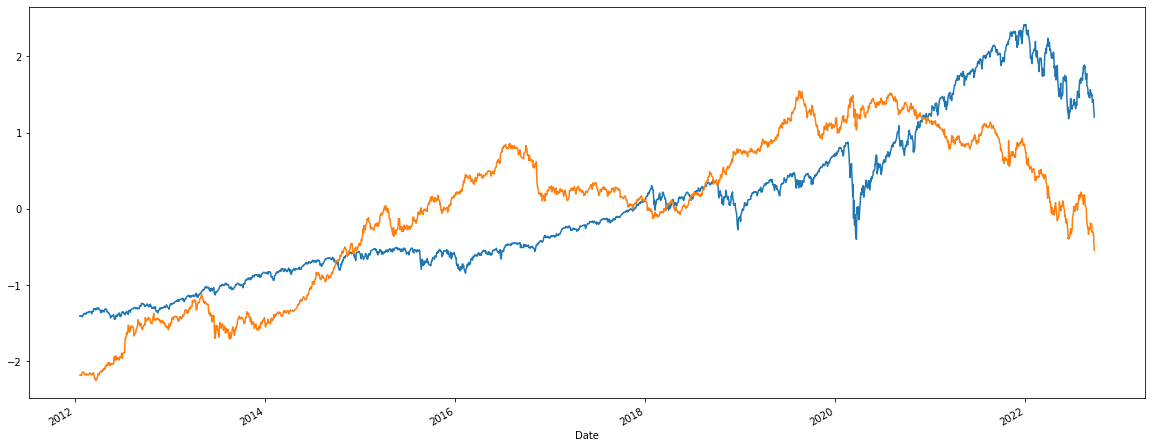

In [16]:
plt.figure(figsize=(20,8))
normalizedCloseDataset['SPY'].plot(label = "stock")
normalizedCloseDataset['kodex10Bond'].plot(label="bond")
plt.show()

- cagr: 7%
- mdd : 22%

In [17]:
portDayReturn, portCumReturn = getPortfolioResult(closeDataSet)

In [18]:
portDayReturn

Date
2012-01-20    1.000000
2012-01-25    1.002311
2012-01-26    0.997130
2012-01-27    1.000473
2012-01-30    0.999596
                ...   
2022-09-19    1.004676
2022-09-20    0.991628
2022-09-21    0.985748
2022-09-22    0.992162
2022-09-23    0.985491
Length: 2548, dtype: float64

In [19]:
portCumReturn

Date
2012-01-20    1.000000
2012-01-25    1.002311
2012-01-26    0.999435
2012-01-27    0.999908
2012-01-30    0.999504
                ...   
2022-09-19    2.090332
2022-09-20    2.072832
2022-09-21    2.043290
2022-09-22    2.027275
2022-09-23    1.997861
Length: 2548, dtype: float64

In [20]:
print("주식 : 채권 1:1 10년 최종수익률")
print(portCumReturn.iloc[-1])
portCagr, portDd, portMdd= getEvaluation(portCumReturn)

주식 : 채권 1:1 10년 최종수익률
1.9978610804538155
최종 수익률 : 1.9978610804538155
cagr: 1.0708440727301631
mdd: 22.453019462509666


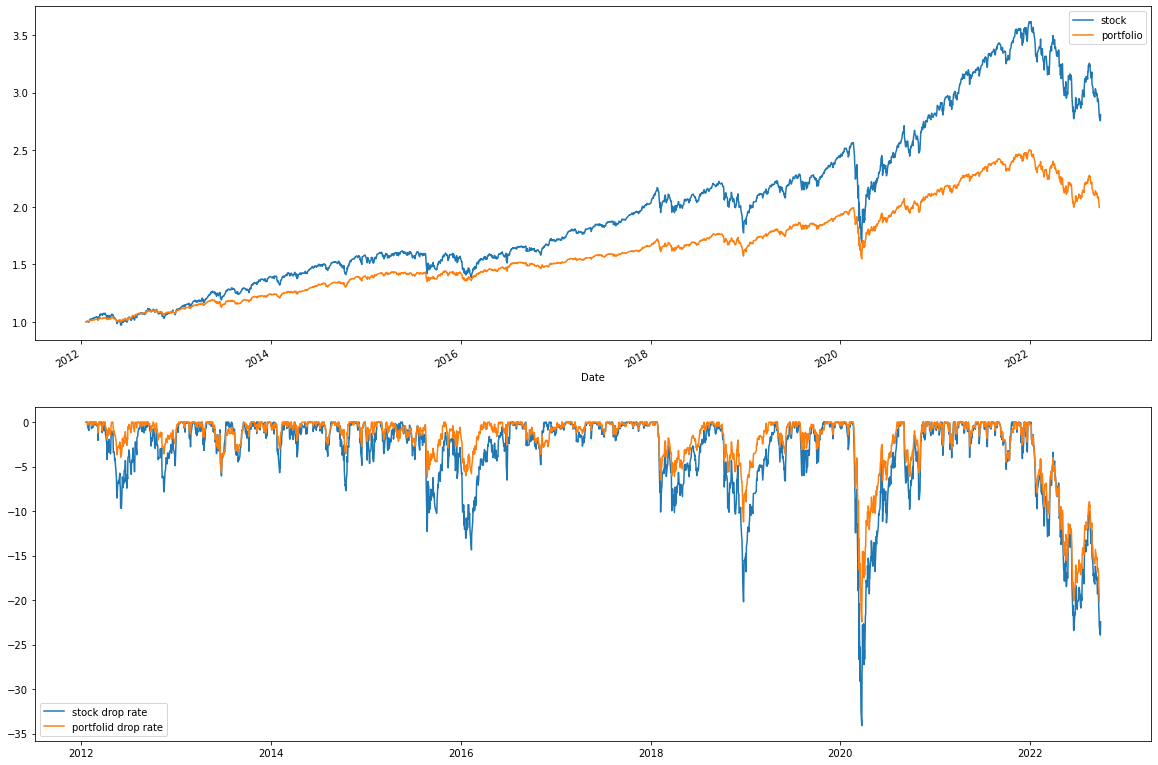

In [23]:
plt.figure(figsize=(20,15))

#수익곡선
plt.subplot(2,1,1)
SPYCumReturn.plot(label = "stock")
portCumReturn.plot(label="portfolio")
plt.legend()

#dd 곡선
plt.subplot(2,1,2)
plt.plot(SPYDd*-1, label  = "stock drop rate")
plt.plot(portDd* -1,label="portfolid drop rate")
plt.legend()

plt.show()

In [24]:
SPY

Date
1999-12-31    146.875000
2000-01-03    145.437500
2000-01-04    139.750000
2000-01-05    140.000000
2000-01-06    137.750000
                 ...    
2022-09-19    388.549988
2022-09-20    384.089996
2022-09-21    377.390015
2022-09-22    374.220001
2022-09-23    367.950012
Name: Close, Length: 5720, dtype: float64

In [25]:
closeDataSet2 = pd.DataFrame(SPY)
closeDataSet2.columns = ['SPY']
closeDataSet2.loc[:,'cash']=1
closeDataSet2 = closeDataSet2.loc['2012-01-20':]
closeDataSet2

,SPY,cash
Date,,
2012-01-20,131.949997,1
2012-01-23,131.610001,1
2012-01-24,131.460007,1
2012-01-25,132.559998,1
2012-01-26,131.880005,1
...,...,...
2022-09-19,388.549988,1
2022-09-20,384.089996,1
2022-09-21,377.390015,1


In [27]:
portDayReturn2, portCumReturn2 = getPortfolioResult(closeDataSet2)
print("주식:현금 1:1 혼합 포트폴리오 최종 수익률")
print(portCumReturn2.iloc[-1])
portCagr2, portDd2, portMdd2 = getEvaluation(portCumReturn2)

주식:현금 1:1 혼합 포트폴리오 최종 수익률
1.894278214160781
최종 수익률 : 1.894278214160781
cagr: 1.0617208667195406
mdd: 24.535924862735296


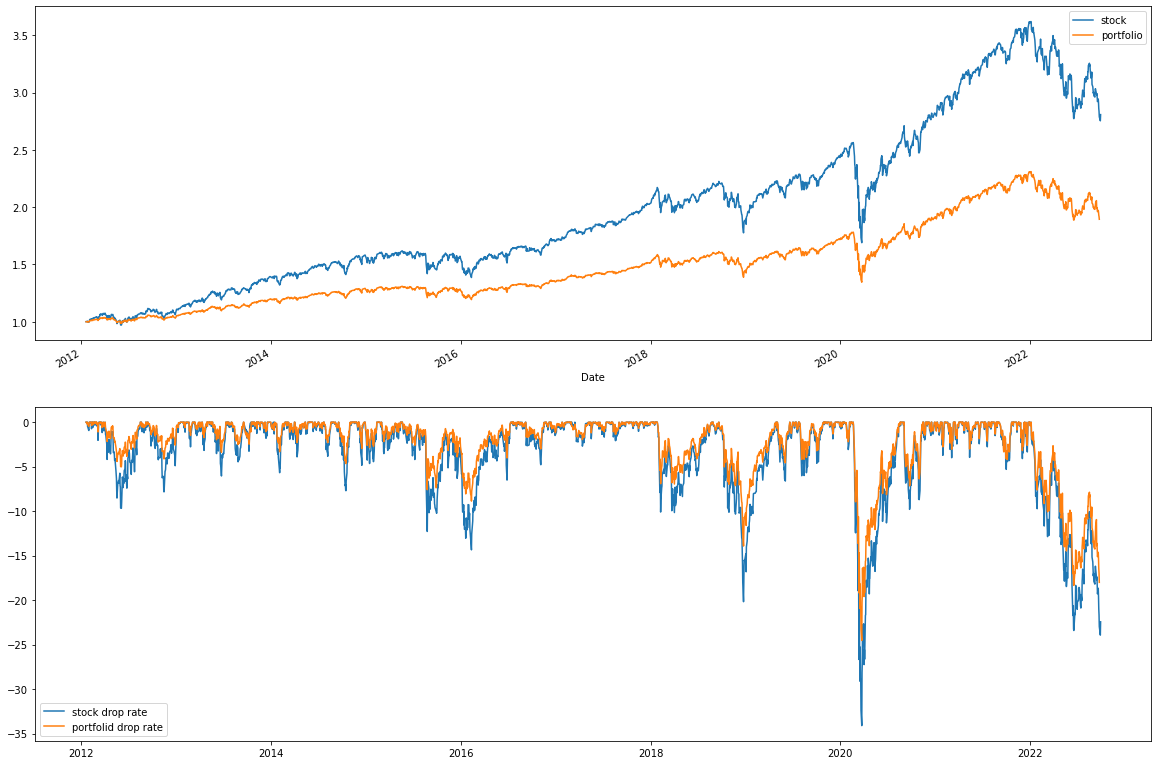

In [29]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
SPYCumReturn.plot(label="stock")
portCumReturn2.plot(label="portfolio")
plt.legend()

plt.subplot(2,1,2)
plt.plot(SPYDd*-1, label = "stock drop rate")
plt.plot(portDd2*-1, label = "portfolid drop rate")
plt.legend()

plt.show()

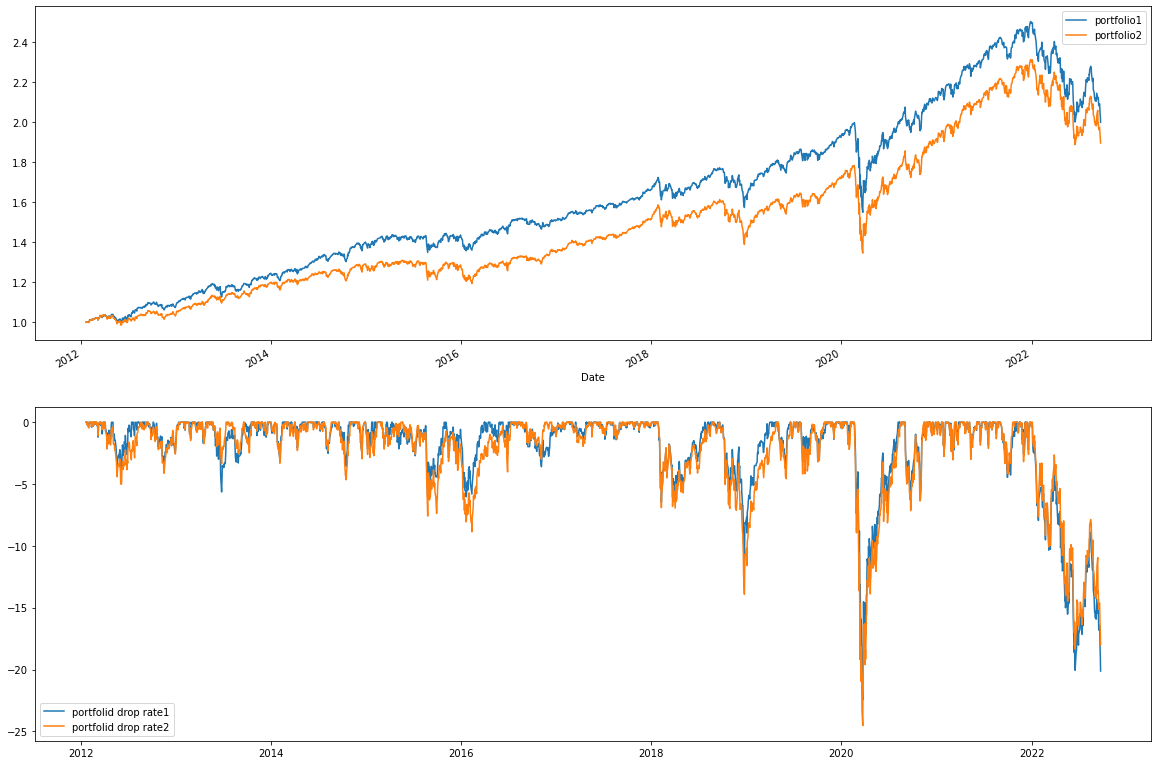

In [30]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
portCumReturn.plot(label="portfolio1")
portCumReturn2.plot(label="portfolio2")
plt.legend()

plt.subplot(2,1,2)
plt.plot(portDd*-1, label = "portfolid drop rate1")
plt.plot(portDd2*-1, label = "portfolid drop rate2")
plt.legend()

plt.show()

In [31]:
kodexShortBond= getCloseData("153130","2012")
closeDataSet3 = pd.DataFrame(SPY)
closeDataSet3 = pd.concat([closeDataSet3, kodexShortBond], axis=1)
closeDataSet3.columns = ['SPY','kodexShortBond']
closeDataSet3.dropna(inplace =True)
closeDataSet3

153130


,SPY,kodexShortBond
Date,,
2012-02-22,136.029999,87277.0
2012-02-23,136.630005,87299.0
2012-02-24,136.929993,87303.0
2012-02-27,137.160004,87308.0
2012-02-28,137.559998,87320.0
...,...,...
2022-09-19,388.549988,103755.0
2022-09-20,384.089996,103765.0
2022-09-21,377.390015,103765.0


In [33]:
portDayReturn3, portCumReturn3 =  getPortfolioResult(closeDataSet3)
print("주식:단기채 1:1 혼합 포트폴리오 최종 수익률")
print(portCumReturn3.iloc[-1])
portCagr3, portDd3, portMdd3 = getEvaluation(portCumReturn3)

주식:단기채 1:1 혼합 포트폴리오 최종 수익률
1.9462008381251068
최종 수익률 : 1.9462008381251068
cagr: 1.0686297252353396
mdd: 23.13935760365008


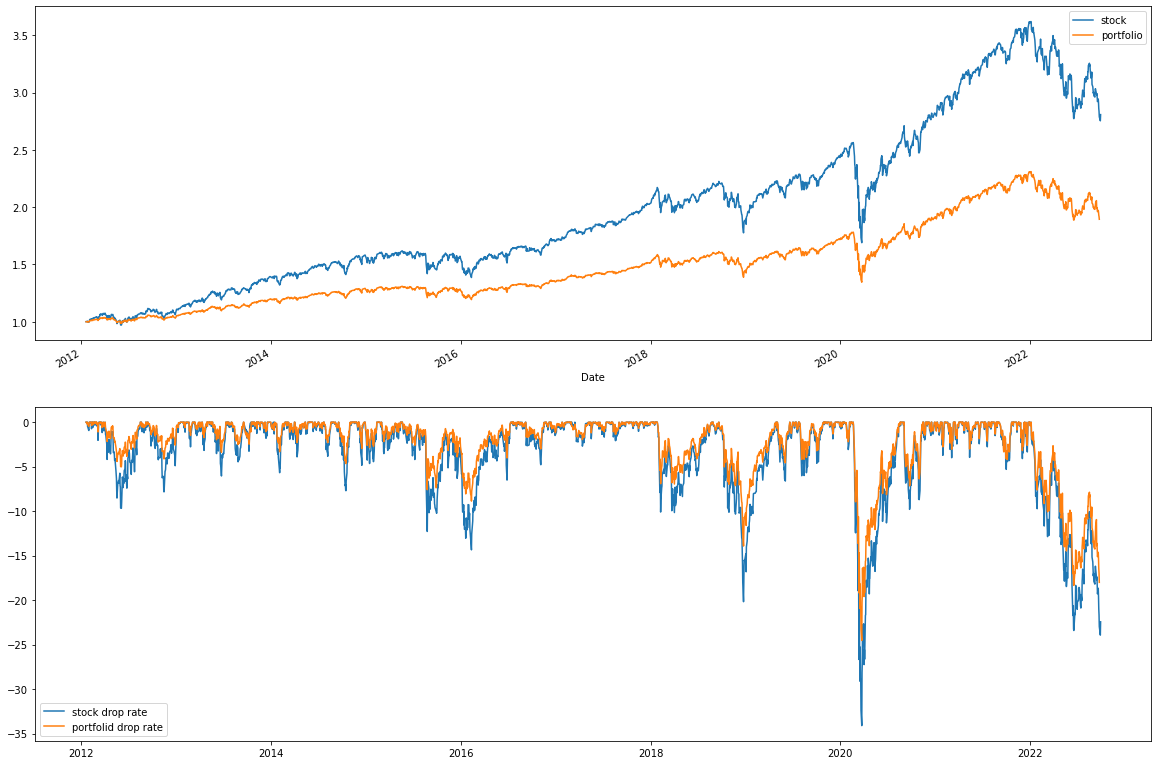

In [34]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
SPYCumReturn.plot(label="stock")
portCumReturn2.plot(label="portfolio")
plt.legend()

plt.subplot(2,1,2)
plt.plot(SPYDd*-1, label = "stock drop rate")
plt.plot(portDd2*-1, label = "portfolid drop rate")
plt.legend()

plt.show()